# Predicting Wine Classification Using KNN, ANN, DTree and Random Forest
    Author: Adeyemi Adedoyin Simeon
    Date: June 12, 2019
    Venue: @ Offa (Home)
    Version: 1.0
    

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
wine = load_wine()

In [3]:
df = pd.DataFrame(wine.data,columns=wine.feature_names)

In [4]:
df['wine_class'] = wine.target

In [10]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [5]:
print(wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [8]:
# Exploring the dataset
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,0


In [12]:
# Verifying if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
wine_class                      178 non-null int32
dtypes: float64(13), int32(1)
memory usage: 18.9 KB


In [192]:
# Table of correlation among features and Target Variable
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


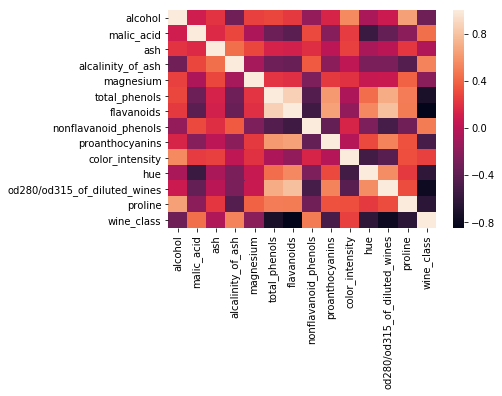

In [190]:
sns.heatmap(data=df.corr())

## Splitting the dataset into independent, X, and dependent, y, variables

In [74]:
X = df.drop('wine_class',axis=1)
y = df.wine_class

# Scaling

In [154]:
from sklearn.preprocessing import StandardScaler

In [157]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [163]:
X = pd.DataFrame(data=X, columns=df.columns[:-1], )

## Splitting the dataset into training and test set

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


In [166]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# BUILDING THE ANN MODEL

In [167]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [168]:
n_out_nodes = int(len(X_train.columns) / 2)
input_shp = (len(X_train.columns),)

# Initializing the ANN
ann = Sequential()

# First Hidden Layer with Input Layer
ann.add(Dense(units=n_out_nodes, activation='relu', 
              kernel_initializer='uniform',input_shape=input_shp)
       )

# Second Hidden Layer
ann.add(Dense(units=n_out_nodes, activation='relu', kernel_initializer='uniform'))

# Output Layer
ann.add(Dense(units=3, activation='softmax', kernel_initializer='uniform'))

# Compiling the ANN model
ann.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Initializing KNN, Decision Tree and Random Forest Models

In [169]:
from sklearn.model_selection import GridSearchCV

In [170]:
knn_param = {'n_neighbors':list(range(1,51))}
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_param, scoring='accuracy')

In [171]:
dt_param = {'criterion':['gini','entropy']}
dt_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=dt_param, scoring='accuracy')

In [172]:
rf_param = {'n_estimators': list(range(5,51)), 'criterion':['gini','entropy']}
rf_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_param, scoring='accuracy')

### Training the Models

In [173]:
# ANN
from pandas import get_dummies

y_ann = get_dummies(y_train)
ann.fit(X_train,y_ann,batch_size=10,epochs=250)

Epoch 1/250
133/133 [==============================] - 0s 3ms/step - loss: 1.0985 - acc: 0.3459
Epoch 2/250
133/133 [==============================] - 0s 158us/step - loss: 1.0973 - acc: 0.4060
Epoch 3/250
133/133 [==============================] - 0s 196us/step - loss: 1.0957 - acc: 0.4060
Epoch 4/250
133/133 [==============================] - 0s 245us/step - loss: 1.0922 - acc: 0.4060
Epoch 5/250
133/133 [==============================] - 0s 245us/step - loss: 1.0844 - acc: 0.4060
Epoch 6/250
133/133 [==============================] - 0s 233us/step - loss: 1.0704 - acc: 0.4060
Epoch 7/250
133/133 [==============================] - 0s 245us/step - loss: 1.0484 - acc: 0.4211
Epoch 8/250
133/133 [==============================] - 0s 218us/step - loss: 1.0150 - acc: 0.5940
Epoch 9/250
133/133 [==============================] - 0s 256us/step - loss: 0.9694 - acc: 0.6692
Epoch 10/250
133/133 [==============================] - 0s 271us/step - loss: 0.9132 - acc: 0.6767
Epoch 11/250
133/133 

133/133 [==============================] - 0s 169us/step - loss: 0.0017 - acc: 1.0000
Epoch 165/250
133/133 [==============================] - 0s 181us/step - loss: 0.0017 - acc: 1.0000
Epoch 166/250
133/133 [==============================] - 0s 158us/step - loss: 0.0017 - acc: 1.0000
Epoch 167/250
133/133 [==============================] - 0s 271us/step - loss: 0.0016 - acc: 1.0000
Epoch 168/250
133/133 [==============================] - 0s 166us/step - loss: 0.0016 - acc: 1.0000
Epoch 169/250
133/133 [==============================] - 0s 263us/step - loss: 0.0016 - acc: 1.0000
Epoch 170/250
133/133 [==============================] - 0s 282us/step - loss: 0.0016 - acc: 1.0000
Epoch 171/250
133/133 [==============================] - 0s 222us/step - loss: 0.0015 - acc: 1.0000
Epoch 172/250
133/133 [==============================] - 0s 248us/step - loss: 0.0015 - acc: 1.0000
Epoch 173/250
133/133 [==============================] - 0s 233us/step - loss: 0.0015 - acc: 1.0000
Epoch 174/250


In [174]:
knn_grid.fit(X_train,y_train)
dt_grid.fit(X_train,y_train)
rf_grid.fit(X_train,y_train)

print('KNN Params:', knn_grid.best_params_)
print('DTree Params:', dt_grid.best_params_)
print('Random For. Params:', rf_grid.best_params_)

KNN Params: {'n_neighbors': 1}
DTree Params: {'criterion': 'gini'}
Random For. Params: {'criterion': 'gini', 'n_estimators': 50}


# Predictions

In [175]:
ann_pred = ann.predict_classes(X_test)
knn_pred = knn_grid.predict(X_test)
dt_pred = dt_grid.predict(X_test)
rf_pred = rf_grid.predict(X_test)

In [176]:
results = pd.DataFrame(data=list(zip(y_test,knn_pred,dt_pred,rf_pred,ann_pred)), index=y_test.index,
                       columns=['True Value','KNN Pred.', 'DTree Pred.', 'Random For. Pred.','ANN Pred.'])

In [177]:
results.head()

,True Value,KNN Pred.,DTree Pred.,Random For. Pred.,ANN Pred.
37,0,0,0,0,0
32,0,0,0,0,0
148,2,2,2,2,2
42,0,0,0,0,0
153,2,2,2,2,2


# Evaluations

In [178]:
from sklearn.metrics import accuracy_score

In [179]:
knn_acc = round(accuracy_score(y_test, knn_pred) * 100, 1)
dt_acc = round(accuracy_score(y_test, dt_pred) * 100, 1)
rf_acc = round(accuracy_score(y_test, rf_pred) * 100, 1)
ann_acc = round(accuracy_score(y_test, ann_pred) * 100, 1)

names = ['KNN','DTree','RndFor','ANN']
values = [knn_acc, dt_acc, rf_acc, ann_acc]

accuracy_table = pd.DataFrame(data=list(zip(names,values)), columns=['Models','Accuracy'])
accuracy_table.sort_values(by='Accuracy',ascending=False)

,Models,Accuracy
2,RndFor,100.0
3,ANN,100.0
0,KNN,95.6
1,DTree,91.1


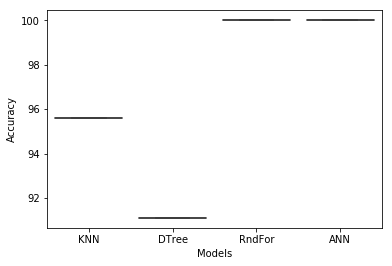

In [181]:
sns.boxplot(x='Models',y='Accuracy',data=accuracy_table)